In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi, sqrt

In [2]:
import numpy as np
dataset = [['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
['4', '4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
['5', '5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
['6', '5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
['7', '4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
['8', '5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
['9', '4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
['10', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
['11', '5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
['12', '4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
['13', '4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
['14', '4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
['15', '5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
['16', '5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
['17', '5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
['18', '5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
['19', '5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
['20', '5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
['21', '5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
['22', '5.1', '3.7', '1.5', '0.4', 'Iris-setosa'],
['23', '4.6', '3.6', '1.0', '0.2', 'Iris-setosa'],
['24', '5.1', '3.3', '1.7', '0.5', 'Iris-setosa'],
['25', '4.8', '3.4', '1.9', '0.2', 'Iris-setosa'],
['26', '5.0', '3.0', '1.6', '0.2', 'Iris-setosa'],
['27', '5.0', '3.4', '1.6', '0.4', 'Iris-setosa'],
['28', '5.2', '3.5', '1.5', '0.2', 'Iris-setosa'],
['29', '5.2', '3.4', '1.4', '0.2', 'Iris-setosa'],
['30', '4.7', '3.2', '1.6', '0.2', 'Iris-setosa'],
['31', '4.8', '3.1', '1.6', '0.2', 'Iris-setosa'],
['32', '5.4', '3.4', '1.5', '0.4', 'Iris-setosa'],
['33', '5.2', '4.1', '1.5', '0.1', 'Iris-setosa'],
['34', '5.5', '4.2', '1.4', '0.2', 'Iris-setosa'],
['35', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
['36', '5.0', '3.2', '1.2', '0.2', 'Iris-setosa'],
['37', '5.5', '3.5', '1.3', '0.2', 'Iris-setosa'],
['38', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
['39', '4.4', '3.0', '1.3', '0.2', 'Iris-setosa'],
['40', '5.1', '3.4', '1.5', '0.2', 'Iris-setosa'],
['41', '5.0', '3.5', '1.3', '0.3', 'Iris-setosa'],
['42', '4.5', '2.3', '1.3', '0.3', 'Iris-setosa'],
['43', '4.4', '3.2', '1.3', '0.2', 'Iris-setosa'],
['44', '5.0', '3.5', '1.6', '0.6', 'Iris-setosa'],
['45', '5.1', '3.8', '1.9', '0.4', 'Iris-setosa'],
['46', '4.8', '3.0', '1.4', '0.3', 'Iris-setosa'],
['47', '5.1', '3.8', '1.6', '0.2', 'Iris-setosa'],
['48', '4.6', '3.2', '1.4', '0.2', 'Iris-setosa'],
['49', '5.3', '3.7', '1.5', '0.2', 'Iris-setosa'],
['50', '5.0', '3.3', '1.4', '0.2', 'Iris-setosa'],
['51', '7.0', '3.2', '4.7', '1.4', 'Iris-versicolor'],
['52', '6.4', '3.2', '4.5', '1.5', 'Iris-versicolor'],
['53', '6.9', '3.1', '4.9', '1.5', 'Iris-versicolor'],
['54', '5.5', '2.3', '4.0', '1.3', 'Iris-versicolor'],
['55', '6.5', '2.8', '4.6', '1.5', 'Iris-versicolor'],
['56', '5.7', '2.8', '4.5', '1.3', 'Iris-versicolor'],
['57', '6.3', '3.3', '4.7', '1.6', 'Iris-versicolor'],
['58', '4.9', '2.4', '3.3', '1.0', 'Iris-versicolor'],
['59', '6.6', '2.9', '4.6', '1.3', 'Iris-versicolor'],
['60', '5.2', '2.7', '3.9', '1.4', 'Iris-versicolor'],
['61', '5.0', '2.0', '3.5', '1.0', 'Iris-versicolor'],
['62', '5.9', '3.0', '4.2', '1.5', 'Iris-versicolor'],
['63', '6.0', '2.2', '4.0', '1.0', 'Iris-versicolor'],
['64', '6.1', '2.9', '4.7', '1.4', 'Iris-versicolor'],
['65', '5.6', '2.9', '3.6', '1.3', 'Iris-versicolor'],
['66', '6.7', '3.1', '4.4', '1.4', 'Iris-versicolor'],
['67', '5.6', '3.0', '4.5', '1.5', 'Iris-versicolor'],
['68', '5.8', '2.7', '4.1', '1.0', 'Iris-versicolor'],
['69', '6.2', '2.2', '4.5', '1.5', 'Iris-versicolor'],
['70', '5.6', '2.5', '3.9', '1.1', 'Iris-versicolor'],
['71', '5.9', '3.2', '4.8', '1.8', 'Iris-versicolor'],
['72', '6.1', '2.8', '4.0', '1.3', 'Iris-versicolor'],
['73', '6.3', '2.5', '4.9', '1.5', 'Iris-versicolor'],
['74', '6.1', '2.8', '4.7', '1.2', 'Iris-versicolor'],
['75', '6.4', '2.9', '4.3', '1.3', 'Iris-versicolor'],
['76', '6.6', '3.0', '4.4', '1.4', 'Iris-versicolor'],
['77', '6.8', '2.8', '4.8', '1.4', 'Iris-versicolor'],
['78', '6.7', '3.0', '5.0', '1.7', 'Iris-versicolor'],
['79', '6.0', '2.9', '4.5', '1.5', 'Iris-versicolor'],
['80', '5.7', '2.6', '3.5', '1.0', 'Iris-versicolor'],
['81', '5.5', '2.4', '3.8', '1.1', 'Iris-versicolor'],
['82', '5.5', '2.4', '3.7', '1.0', 'Iris-versicolor'],
['83', '5.8', '2.7', '3.9', '1.2', 'Iris-versicolor'],
['84', '6.0', '2.7', '5.1', '1.6', 'Iris-versicolor'],
['85', '5.4', '3.0', '4.5', '1.5', 'Iris-versicolor'],
['86', '6.0', '3.4', '4.5', '1.6', 'Iris-versicolor'],
['87', '6.7', '3.1', '4.7', '1.5', 'Iris-versicolor'],
['88', '6.3', '2.3', '4.4', '1.3', 'Iris-versicolor'],
['89', '5.6', '3.0', '4.1', '1.3', 'Iris-versicolor'],
['90', '5.5', '2.5', '4.0', '1.3', 'Iris-versicolor'],
['91', '5.5', '2.6', '4.4', '1.2', 'Iris-versicolor'],
['92', '6.1', '3.0', '4.6', '1.4', 'Iris-versicolor'],
['93', '5.8', '2.6', '4.0', '1.2', 'Iris-versicolor'],
['94', '5.0', '2.3', '3.3', '1.0', 'Iris-versicolor'],
['95', '5.6', '2.7', '4.2', '1.3', 'Iris-versicolor'],
['96', '5.7', '3.0', '4.2', '1.2', 'Iris-versicolor'],
['97', '5.7', '2.9', '4.2', '1.3', 'Iris-versicolor'],
['98', '6.2', '2.9', '4.3', '1.3', 'Iris-versicolor'],
['99', '5.1', '2.5', '3.0', '1.1', 'Iris-versicolor'],
['100', '5.7', '2.8', '4.1', '1.3', 'Iris-versicolor'],
['101', '6.3', '3.3', '6.0', '2.5', 'Iris-virginica'],
['102', '5.8', '2.7', '5.1', '1.9', 'Iris-virginica'],
['103', '7.1', '3.0', '5.9', '2.1', 'Iris-virginica'],
['104', '6.3', '2.9', '5.6', '1.8', 'Iris-virginica'],
['105', '6.5', '3.0', '5.8', '2.2', 'Iris-virginica'],
['106', '7.6', '3.0', '6.6', '2.1', 'Iris-virginica'],
['107', '4.9', '2.5', '4.5', '1.7', 'Iris-virginica'],
['108', '7.3', '2.9', '6.3', '1.8', 'Iris-virginica'],
['109', '6.7', '2.5', '5.8', '1.8', 'Iris-virginica'],
['110', '7.2', '3.6', '6.1', '2.5', 'Iris-virginica'],
['111', '6.5', '3.2', '5.1', '2.0', 'Iris-virginica'],
['112', '6.4', '2.7', '5.3', '1.9', 'Iris-virginica'],
['113', '6.8', '3.0', '5.5', '2.1', 'Iris-virginica'],
['114', '5.7', '2.5', '5.0', '2.0', 'Iris-virginica'],
['115', '5.8', '2.8', '5.1', '2.4', 'Iris-virginica'],
['116', '6.4', '3.2', '5.3', '2.3', 'Iris-virginica'],
['117', '6.5', '3.0', '5.5', '1.8', 'Iris-virginica'],
['118', '7.7', '3.8', '6.7', '2.2', 'Iris-virginica'],
['119', '7.7', '2.6', '6.9', '2.3', 'Iris-virginica'],
['120', '6.0', '2.2', '5.0', '1.5', 'Iris-virginica'],
['121', '6.9', '3.2', '5.7', '2.3', 'Iris-virginica'],
['122', '5.6', '2.8', '4.9', '2.0', 'Iris-virginica'],
['123', '7.7', '2.8', '6.7', '2.0', 'Iris-virginica'],
['124', '6.3', '2.7', '4.9', '1.8', 'Iris-virginica'],
['125', '6.7', '3.3', '5.7', '2.1', 'Iris-virginica'],
['126', '7.2', '3.2', '6.0', '1.8', 'Iris-virginica'],
['127', '6.2', '2.8', '4.8', '1.8', 'Iris-virginica'],
['128', '6.1', '3.0', '4.9', '1.8', 'Iris-virginica'],
['129', '6.4', '2.8', '5.6', '2.1', 'Iris-virginica'],
['130', '7.2', '3.0', '5.8', '1.6', 'Iris-virginica'],
['131', '7.4', '2.8', '6.1', '1.9', 'Iris-virginica'],
['132', '7.9', '3.8', '6.4', '2.0', 'Iris-virginica'],
['133', '6.4', '2.8', '5.6', '2.2', 'Iris-virginica'],
['134', '6.3', '2.8', '5.1', '1.5', 'Iris-virginica'],
['135', '6.1', '2.6', '5.6', '1.4', 'Iris-virginica'],
['136', '7.7', '3.0', '6.1', '2.3', 'Iris-virginica'],
['137', '6.3', '3.4', '5.6', '2.4', 'Iris-virginica'],
['138', '6.4', '3.1', '5.5', '1.8', 'Iris-virginica'],
['139', '6.0', '3.0', '4.8', '1.8', 'Iris-virginica'],
['140', '6.9', '3.1', '5.4', '2.1', 'Iris-virginica'],
['141', '6.7', '3.1', '5.6', '2.4', 'Iris-virginica'],
['142', '6.9', '3.1', '5.1', '2.3', 'Iris-virginica'],
['143', '5.8', '2.7', '5.1', '1.9', 'Iris-virginica'],
['144', '6.8', '3.2', '5.9', '2.3', 'Iris-virginica'],
['145', '6.7', '3.3', '5.7', '2.5', 'Iris-virginica'],
['146', '6.7', '3.0', '5.2', '2.3', 'Iris-virginica'],
['147', '6.3', '2.5', '5.0', '1.9', 'Iris-virginica'],
['148', '6.5', '3.0', '5.2', '2.0', 'Iris-virginica'],
['149', '6.2', '3.4', '5.4', '2.3', 'Iris-virginica'],
['150', '5.9', '3.0', '5.1', '1.8', 'Iris-virginica']]


unlabelled_dataset = [np.array([float(data[1]) for data in dataset]), np.array([float(data[2]) for data in dataset]), 
                      np.array([float(data[3]) for data in dataset]), np.array([float(data[4]) for data in dataset])]

means = [sum(unlabelled_dataset[i])/150 for i in range(4)]
stdevs = [(sum(unlabelled_dataset[i]**2)/150 - means[i]**2)**(1/2) for i in range(4)]
epsilon = 0.01
qs = [np.quantile(unlabelled_dataset[i], 1-(epsilon**(1/4))/2) for i in range(4)]

def data_to_angle(data_entry, data_type, alpha=0.1): 
    score = (data_entry - means[data_type]) / stdevs[data_type]
    return (1-alpha/2)*(np.pi/qs[data_type])*score

angles = np.array([[data_to_angle(unlabelled_dataset[data_type][sample], data_type) for data_type in range(4)] for sample in range(150)])

real_classes = np.zeros(150, dtype = int)
for sample in range(150):
    if dataset[sample][5] == 'Iris-versicolor':
        real_classes[sample] = 1
    if dataset[sample][5] == 'Iris-virginica':
        real_classes[sample] = 2


In [3]:
#Basic parameterized Ising gate
def ising_gate(qc, angle, site1, site2):
    qc.cx(site1, site2)
    qc.rz(angle, site2)
    qc.cx(site1, site2)

def kernel_circuit(qc, inputs1, inputs2):
    for i in range(2): #Encoding part
        for site in range(qc.num_qubits):
            qc.h(site)
        ising_gate(qc, inputs1[0], 0, 1)
        ising_gate(qc, inputs1[1], 2, 3)
        ising_gate(qc, inputs1[2], 0, 2)
        ising_gate(qc, inputs1[3], 1, 3)
    for i in range(2): #Encoding part
        ising_gate(qc, -inputs2[3], 1, 3)
        ising_gate(qc, -inputs2[2], 0, 2)
        ising_gate(qc, -inputs2[1], 2, 3)
        ising_gate(qc, -inputs2[0], 0, 1)
        for site in range(qc.num_qubits):
            qc.h(site)

#Computing the kernel with a normal backend
def kernel(inputs1, inputs2, backend, shots = 750):
    nqubits = 4
    qc = QuantumCircuit(nqubits)
    kernel_circuit(qc, inputs1, inputs2)
    qc.measure_all()
    job_counts = execute(qc, backend, shots=shots).result().get_counts(qc)
    key = '0'*nqubits
    key_count = job_counts[key] if (key in job_counts) else 0
    return key_count/shots

#Computing a kernel directly through the statevector
def kernel_sv(inputs1, inputs2):
    nqubits = 4
    qc = QuantumCircuit(nqubits)
    kernel_circuit(qc, inputs1, inputs2)
    qc.save_statevector()
    sv_backend = Aer.get_backend('aer_simulator')
    sv = sv_backend.run(qc).result().get_statevector(qc)
    return np.abs(sv[0])**2

In [9]:
import time
from qiskit.test.mock import FakeVigo

def get_kernel_matrix(training_angles, sv = False):
    time_start = time.time()
    previous_step_time = time_start
    N = len(training_angles)
    kernel_matrix = np.zeros((N, N))
    print("Created matrix of shape {}".format(kernel_matrix.shape))
    
    backend = Aer.get_backend('qasm_simulator') #currently set to run on a qasm_simulator backend with 750 shots
    for i in range(N):
        for j in range(N):
            if sv:
                kernel_matrix[i,j] = kernel_sv(training_angles[i], training_angles[j])
            else:
                kernel_matrix[i,j] = kernel(training_angles[i], training_angles[j], backend)
        step_time = time.time()
        print("Computed all kernels for row {}    ({:.3f} s)".format(i, step_time - previous_step_time))
        previous_step_time = step_time
    
    kernel_matrix = 0.5*(kernel_matrix+np.transpose(kernel_matrix))
    print("Kernel matrix computed ({:.4f} s)".format(time.time() - time_start))
    return kernel_matrix

In [5]:
import matplotlib.pyplot as plt
import scipy.linalg

def plot_kernel_matrix(kernel_matrix):
    plt.imshow(kernel_matrix)
    plt.title("Kernel matrix of training data")
    plt.colorbar()
    plt.show()

def readjust_kernel_matrix(kernel_matrix): #The kernel matrix needs to be positive semidefinite
    kvals, kvecs = scipy.linalg.eig(kernel_matrix)
    lowest_eval = np.amin(kvals)
    new_kernel = kernel_matrix
    if lowest_eval < 0:
        readjusted_kvals = kvals - lowest_eval
        new_kernel = np.real(kvecs@np.diag(readjusted_kvals)@np.transpose(kvecs))
    diff = new_kernel - kernel_matrix
    print("Re-Zeroing Error: {}".format(scipy.linalg.norm(diff)))
    return new_kernel

In [7]:
def objective_fn(params, training_values, kernel_matrix):
    assert len(training_values) == (len(params))
    ya = training_values*params
    return - np.sum(params) + 0.5*(np.transpose(ya)@kernel_matrix@ya)

def objective_gradient(params, training_values, kernel_matrix):
    og = -np.ones(len(params))
    ya = training_values*params
    Kya = kernel_matrix@ya
    og += 0.5*training_values*Kya
    return og


In [19]:
import scipy.optimize

def optimize_params(training_classes, kernel_matrix):
    training_values_all = np.array([[1 if t == i else -1 for t in training_classes] for i in range(3)], dtype = int)
    starting_params = np.abs(np.random.rand(training_size))

    nonneg = scipy.optimize.Bounds(0, np.inf) #Specifies that the parameters are non-negative
    nfev = np.zeros(3)
    params = []
    losses = np.zeros(3)
    objective_vals = []
    for c in range(3):
        def callback_kernel(params):
            objective_vals.append(objective_fn(params, training_values_all[c], kernel_matrix))
        
        ortho = scipy.optimize.LinearConstraint(training_values_all[c], 0, 0) #Specifies that the parameters and training classes are orthogonal
        res = scipy.optimize.minimize(objective_fn, starting_params, args = (training_values_all[c], kernel_matrix), jac = objective_gradient, bounds = nonneg, constraints = ortho, callback = callback_kernel)
        params.append(res.x)
        nfev[c] = res.nfev
        losses[c] = objective_fn(res.x, training_values_all[c], kernel_matrix)

    print("After {} calls, found solutions with average loss function {}".format(np.sum(nfev), losses))

    biases = np.zeros(3)

    ya = [training_values_all[c]*params[c] for c in range(3)]
    Kya = [kernel_matrix@ya[c] for c in range(3)]
    
    for c in range(3):
        starting_bias = 0
        be = np.sum(np.sign(training_values_all[c]) - np.sign(Kya[c] + starting_bias))
        possible_bias_values = [0]
        possible_bias_errors = [np.abs(be)]
        while np.abs(be) > 1:
            guesses = Kya[c] + starting_bias
            starting_bias += -1.0001*np.amin(guesses[guesses*np.sign(be) < 0]) #e.g. if bias error is too negative, that means we need to remove some positive guesses
            possible_bias_values.append(starting_bias)
            be = np.sum(np.sign(training_values_all[c]) - np.sign(Kya[c] + starting_bias))
            possible_bias_errors.append(np.abs(be))
        biases[c] = possible_bias_values[np.argmin(np.array(possible_bias_errors))]
        print("Found bias value of {} with total sign error".format(biases[c], be))
    return params, biases, objective_vals


In [11]:
#The normal kernel matrix method is for binary decisions
#For 3 classes we compare the binary decisions (A/not A) (B/not B) (C/not C)
#If a system did not choose 1 class we randomly choose between the most selected classes
def best_sign(input_vec): 
    candidates = []
    for ind, val in enumerate(input_vec):
        if val == 1:
            candidates.append(ind)
    if len(candidates) == 1:
        return candidates[0]
    if len(candidates) == 0:
        candidates = [0,1,2] 
    return np.random.choice(candidates)

def classifier(input_s, params, biases, training_args, base_kernel_vector = None, sv = False):
    training_angles = angles[training_args,:]
    training_classes = real_classes[training_args]
    training_values_all = np.array([[1 if t == i else -1 for t in training_classes] for i in range(3)], dtype = int)
    kernel_vector = np.zeros(len(training_args))
    ya = [training_values_all[c]*params[c] for c in range(3)]
    if base_kernel_vector is not None:
        kernel_vector = base_kernel_vector.flatten()[training_args]
    else:
        backend = Aer.get_backend('qasm_simulator')
        for i in range(training_size):
            if sv:
                kernel_vector[i] = kernel_sv(training_angles[i], input_s)
            else:
                kernel_vector[i] = kernel(training_angles[i], input_s, backend)
    signs = np.zeros(3, dtype = int)
    for c in range(3):
        signs[c] = np.sign(np.dot(ya[c], kernel_vector) + biases[c])
    return best_sign(signs)



In [12]:
def check_training(params, biases, training_args, full_kernel_matrix = None):
    training_args_sorted = np.sort(training_args)
    test_args = []
    training_point = 0
    for test_ind in range(150):
        if training_point >= len(training_args_sorted):
            test_args.append(test_ind)
            continue
        if test_ind == training_args_sorted[training_point]:
            training_point += 1
        else:
            test_args.append(test_ind)
    test_args = np.array(test_args, dtype = int)
    confusion_matrix = np.zeros((3,3), dtype = int)

    time_step = time.time()
    for num_guesses,test_arg in enumerate(test_args):
        kernel_vector = None
        if full_kernel_matrix is not None:
            kernel_vector = full_kernel_matrix[:,test_arg]
        m = classifier(angles[test_arg], params, biases, training_args, base_kernel_vector = kernel_vector)
        confusion_matrix[m, real_classes[test_arg]] += 1
        time_step_new = time.time()
        time_step = time_step_new
    print(confusion_matrix)
    acc = (confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2])/np.sum(confusion_matrix.flatten())
    print("Testing time: {}".format(time.time() - time_step))
    print("Accuracy: {}".format(acc))
    return confusion_matrix, acc



GETTING FULL KERNEL...
Created matrix of shape (150, 150)
Computed all kernels for row 0    (15.882 s)
Computed all kernels for row 1    (15.883 s)
Computed all kernels for row 2    (15.661 s)
Computed all kernels for row 3    (15.227 s)
Computed all kernels for row 4    (15.483 s)
Computed all kernels for row 5    (16.221 s)
Computed all kernels for row 6    (16.049 s)
Computed all kernels for row 7    (14.940 s)
Computed all kernels for row 8    (15.564 s)
Computed all kernels for row 9    (15.622 s)
Computed all kernels for row 10    (16.032 s)
Computed all kernels for row 11    (15.458 s)
Computed all kernels for row 12    (15.350 s)
Computed all kernels for row 13    (15.347 s)
Computed all kernels for row 14    (15.765 s)
Computed all kernels for row 15    (14.920 s)
Computed all kernels for row 16    (15.478 s)
Computed all kernels for row 17    (15.240 s)
Computed all kernels for row 18    (15.163 s)
Computed all kernels for row 19    (14.451 s)
Computed all kernels for row 20 

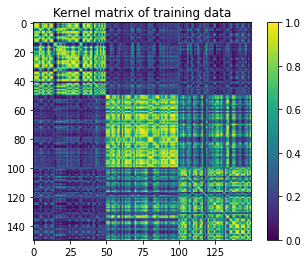

In [13]:
print("GETTING FULL KERNEL...")
full_kernel = get_kernel_matrix(angles, sv = False)
plot_kernel_matrix(full_kernel)


---------------------------------------
TRIAL 0


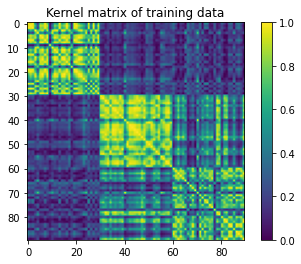

Re-Zeroing Error: 1.2715840970913108
After 2628.0 calls, found solutions with average loss function [ -7.01755149 -63.5111042  -62.92936769]
Found bias value of 0.0 with total sign error
Found bias value of -0.12162456716570898 with total sign error
Found bias value of -3.1353659265407052 with total sign error
[[19  0  1]
 [ 1 18  0]
 [ 0  2 19]]
Testing time: 0.0004119873046875
Accuracy: 0.9333333333333333
---------------------------------------
TRIAL 1
Re-Zeroing Error: 1.2710537183079558
After 1279.0 calls, found solutions with average loss function [-5.53232551e+00 -9.66555562e+10 -1.09001154e+29]
Found bias value of 0.0 with total sign error
Found bias value of -7778072.652479941 with total sign error
Found bias value of 1133982723751836.8 with total sign error
[[20  0  2]
 [ 0 18  4]
 [ 0  2 14]]
Testing time: 0.000156402587890625
Accuracy: 0.8666666666666667
---------------------------------------
TRIAL 2
Re-Zeroing Error: 1.2017629693765728
After 1206.0 calls, found solutions w

/tmp/ipykernel_239/1891023129.py:4: RuntimeWarning: overflow encountered in matmul
  return - np.sum(params) + 0.5*(np.transpose(ya)@kernel_matrix@ya)
/tmp/ipykernel_239/1891023129.py:4: RuntimeWarning: invalid value encountered in matmul
  return - np.sum(params) + 0.5*(np.transpose(ya)@kernel_matrix@ya)


After 1133.0 calls, found solutions with average loss function [-6.21671794e+00 -9.97720602e+33             nan]
Found bias value of 0.0 with total sign error
Found bias value of -1.2631248631723573e+17 with total sign error
Found bias value of -7.166186670907701e+157 with total sign error
[[17  0  0]
 [ 2 16  1]
 [ 1  4 19]]
Testing time: 0.00014925003051757812
Accuracy: 0.8666666666666667
---------------------------------------
TRIAL 304
Re-Zeroing Error: 1.3384130000842496
After 2602.0 calls, found solutions with average loss function [  -4.90148973 -194.77744383 -397.05450491]
Found bias value of 0.0 with total sign error
Found bias value of -10.806953353765534 with total sign error
Found bias value of -1.5358883382891024 with total sign error
[[20  0  0]
 [ 0 19  6]
 [ 0  1 14]]
Testing time: 0.00014495849609375
Accuracy: 0.8833333333333333
---------------------------------------
TRIAL 305
Re-Zeroing Error: 1.287519977251532
After 1248.0 calls, found solutions with average loss fu

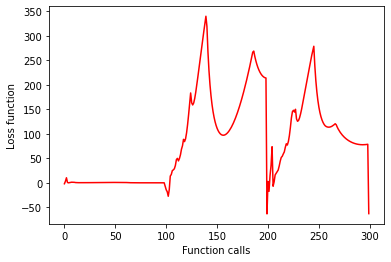

In [21]:
num_training_sets = 500
training_size = 30 #How many members per class should be in the training set
training_sets = np.zeros((num_training_sets, training_size*3), dtype = int)
for i in range(num_training_sets):
    training_sets[i,:training_size] = np.sort(np.random.choice(50, training_size, False))
    training_sets[i,training_size:training_size*2] = np.sort(np.random.choice(50, training_size, False))+50
    training_sets[i,training_size*2:training_size*3] = np.sort(np.random.choice(50, training_size, False))+100

training_size *= 3

test_size = len(dataset) - training_size 

training_sets_to_test = 500
training_set_to_print = 0
confusion_matrices = np.zeros((training_sets_to_test, 3, 3), dtype = int)
accuracies = np.zeros(training_sets_to_test)

for i in range(training_sets_to_test):
    print("---------------------------------------\nTRIAL {}".format(i))
    training_args = training_sets[i,:]
    training_angles = angles[training_args,:]
    training_classes = real_classes[training_args]
    tax, tay = np.meshgrid(training_args, training_args)
    km = full_kernel[tax, tay]
    if i == training_set_to_print:
        plot_kernel_matrix(km)
    readjust_kernel_matrix(km)
    params, biases, objective_vals = optimize_params(training_classes, km)
    #print(objective_vals)
    if i == 0:
        fig = plt.figure()
        plt.plot(range(len(objective_vals)), objective_vals, c="r")
        plt.ylabel("Loss function")
        plt.xlabel("Function calls")
        fig.savefig("kernel_optimization.png")
        
    cf, acc = check_training(params, biases, training_args, full_kernel_matrix = full_kernel)
    confusion_matrices[i,:,:] = cf
    accuracies[i] = acc

In [26]:
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
avg_acc = np.sum(np.diag(avg_confusion_matrix))/np.sum(avg_confusion_matrix)
print(avg_confusion_matrix)
print("Average accuracy: {}".format(avg_acc))

print("Max accuracy: {}".format(np.amax(accuracies)))

print("Min accuracy: {}".format(np.amin(accuracies)))

[[18.602  0.3    0.542]
 [ 0.676 17.432  2.682]
 [ 0.722  2.268 16.776]]
Average accuracy: 0.8801666666666667
Max accuracy: 0.9666666666666667
Min accuracy: 0.6666666666666666


In [23]:
import pandas as pd

kernel_df = pd.DataFrame(full_kernel)
kernel_df.to_csv("full_kernel_statevector.csv")